# 🌿 Medicinal Plant Classification & Use-Case Generation using AI
### Internship Project - AI/ML based Medicinal Plant Identifier

**Objective:** Build a system that classifies medicinal plants from images and generates medicinal uses using any AI model from hugging face.

In [ ]:
%pip install --upgrade pip
%pip install tensorflow==2.19.0


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("TensorFlow version", tf.__version__)


TensorFlow version 2.19.0


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## 📦 2. Set Up Dataset Path and Load Data

In [3]:
# Update the path below with your dataset folder
dataset_path = 'datasets'  # Folder with subfolders: Neem/, Tulsi/, etc.

# Image preprocessing
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

class_labels = list(train_data.class_indices.keys())

Found 5616 images belonging to 80 classes.
Found 1359 images belonging to 80 classes.


## 🧠 3. Build and Train CNN Model

In [ ]:
%pip uninstall keras -y
%pip install keras==3.5.0


In [26]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(class_labels), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=10)


NameError: name 'Sequential' is not defined

# 🎄4. Model MobieNetV2 used as base model to train my dataset.

In [27]:
base_model = MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(len(class_labels), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,606,480 (9.94 MB)

 Trainable params: 348,496 (1.33 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [28]:
# training the datasets by defining some earlystop parameter

early_stop = EarlyStopping(
    monitor='val_loss',      # Watch validation loss
    patience=4,              # Stop after 4 epochs of no improvement
    restore_best_weights=True # Revert to best weights after stopping
)
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stop]
)


d:\Desktop Files\OpenCv\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 449s 3s/step - accuracy: 0.0804 - loss: 4.1770 - val_accuracy: 0.2840 - val_loss: 3.0569
Epoch 2/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.3943 - loss: 2.4779 - val_accuracy: 0.4253 - val_loss: 2.3973
Epoch 3/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.5851 - loss: 1.6378 - val_accuracy: 0.4952 - val_loss: 2.1080
Epoch 4/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.6876 - loss: 1.2062 - val_accuracy: 0.5195 - val_loss: 1.9454
Epoch 5/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.7468 - loss: 0.9765 - val_accuracy: 0.5276 - val_loss: 1.8572
Epoch 6/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.7891 - loss: 0.7804 - val_accuracy: 0.5548 - val_loss: 1.7630
Epoch 7/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.8276 - loss: 0.6652 - val_accuracy: 0.5519 - val_loss: 1.7692
Epoch 8/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.8450 - loss: 0.5652 - val_accu

In [29]:
print("Classes detected:", train_data.class_indices)

Classes detected: {'Aloevera': 0, 'Amla': 1, 'Amruthaballi': 2, 'Arali': 3, 'Astma_weed': 4, 'Badipala': 5, 'Balloon_Vine': 6, 'Bamboo': 7, 'Beans': 8, 'Betel': 9, 'Bhrami': 10, 'Bringaraja': 11, 'Caricature': 12, 'Castor': 13, 'Catharanthus': 14, 'Chakte': 15, 'Chilly': 16, 'Citron lime (herelikai)': 17, 'Coffee': 18, 'Common rue(naagdalli)': 19, 'Coriender': 20, 'Curry': 21, 'Doddpathre': 22, 'Drumstick': 23, 'Ekka': 24, 'Eucalyptus': 25, 'Ganigale': 26, 'Ganike': 27, 'Gasagase': 28, 'Ginger': 29, 'Globe Amarnath': 30, 'Guava': 31, 'Henna': 32, 'Hibiscus': 33, 'Honge': 34, 'Insulin': 35, 'Jackfruit': 36, 'Jasmine': 37, 'Kambajala': 38, 'Kasambruga': 39, 'Kohlrabi': 40, 'Lantana': 41, 'Lemon': 42, 'Lemongrass': 43, 'Malabar_Nut': 44, 'Malabar_Spinach': 45, 'Mango': 46, 'Marigold': 47, 'Mint': 48, 'Neem': 49, 'Nelavembu': 50, 'Nerale': 51, 'Nooni': 52, 'Onion': 53, 'Padri': 54, 'Palak(Spinach)': 55, 'Papaya': 56, 'Parijatha': 57, 'Pea': 58, 'Pepper': 59, 'Pomoegranate': 60, 'Pumpkin': 

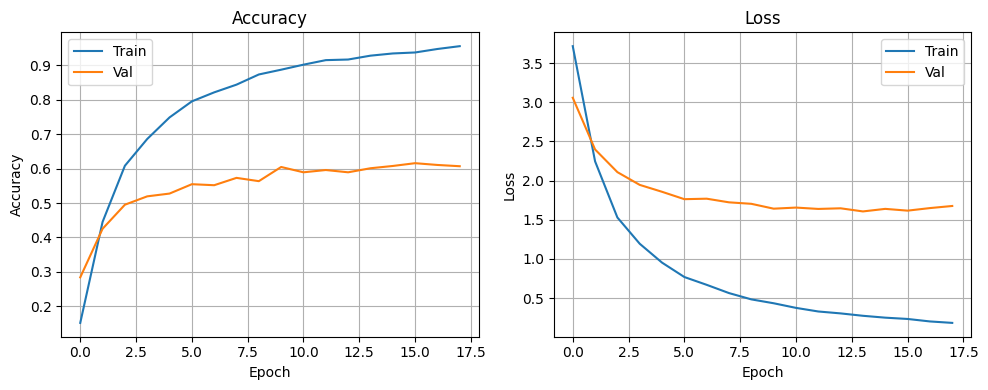

In [30]:
# how my trained model looks like
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## 💾 5. Save the Model for Later Use

In [31]:
import os
import time

file_path = 'plant_classifier_model.keras'

if os.path.exists(file_path):
    last_modified = time.ctime(os.path.getmtime(file_path))
    print(f"Last Modified: {last_modified}")
else:
    print("File does not exist.")


File does not exist.


In [32]:
# i have multiple times rewrite the datasets. so, i had to add this
import os

if os.path.exists("plant_classifier_model.keras"):
    print("⚠️ Model already exists. Skipping save to avoid overwrite.")
else:
    model.save("plant_classifier_model.keras")


## 📤 6. Load and Predict Image

In [4]:
# I have done some changes in loadpredict. /// so if not works try to merge this into below cell
from PIL import Image

# Predict plant from image
def load_and_predict(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model_classifier.predict(img_array)
    class_index = np.argmax(predictions[0])

    if class_index >= len(class_labels):
        raise ValueError(f"Invalid class index {class_index}, only {len(class_labels)} classes available.")

    plant_name = class_labels[class_index]
    plot_prediction_probabilities(predictions)
    return plant_name

# 🤖 7. Get Medicinal Uses from a AI model(Locally downloaded Flan-T5 model)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


C:\Users\anime\AppData\Local\Temp\ipykernel_20164\1814870843.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_probs, y=sorted_labels, palette="crest")


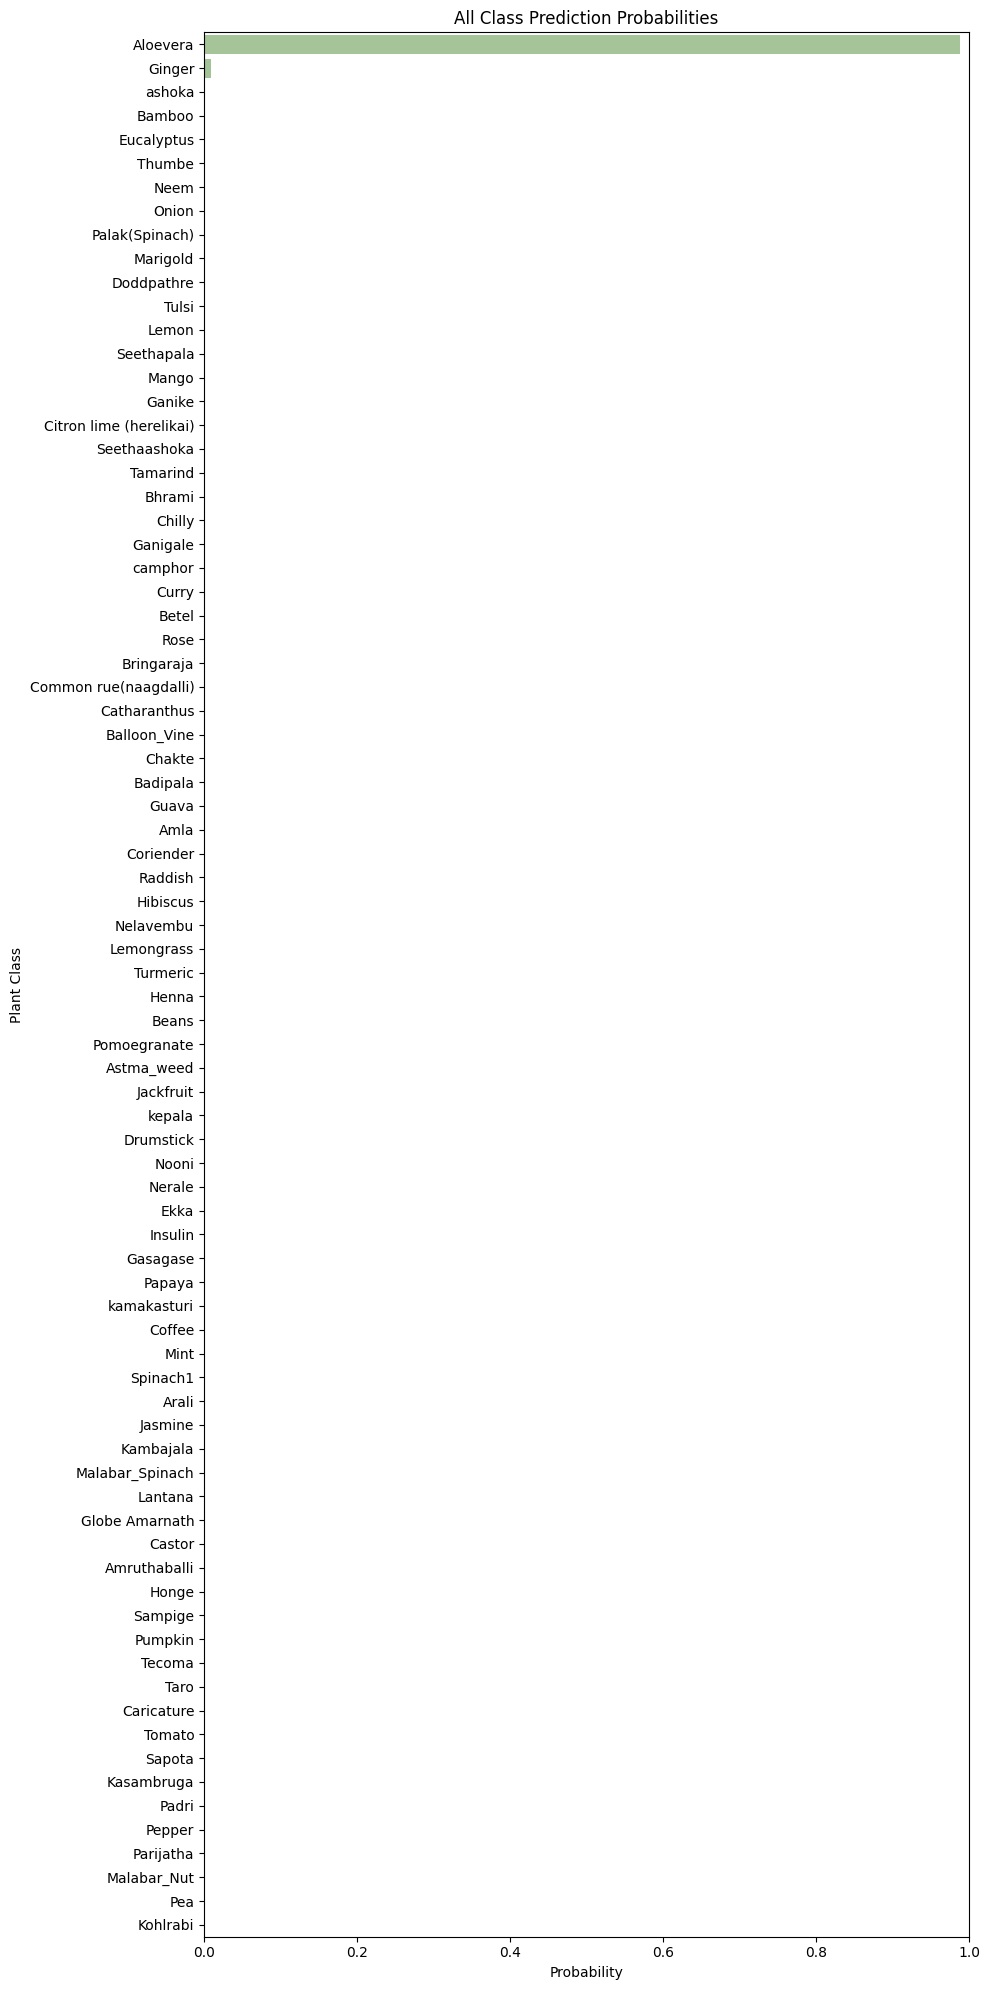


🪴 Plant Predicted: Aloevera
💊 Medicinal Uses:
It may be used as a natural insect repellant, to repel mosquitoes and insects. Aloevera is also believed to be a powerful ayurvedic herb that can help control allergies.


In [5]:
# Imports
import os
import json
import numpy as np
from transformers import T5Tokenizer, T5ForConditionalGeneration
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns

# Load Image Classification Model (.keras format)
model_classifier = load_model("plant_classifier_model.keras")

# Load full class labels (from saved file or hardcoded)
class_labels = [
    'Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo',
    'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte',
    'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry',
    'Doddpathre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger',
    'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Jasmine',
    'Kambajala', 'Kasambruga', 'Kohlrabi', 'Lantana', 'Lemon', 'Lemongrass', 'Malabar_Nut',
    'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion',
    'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomoegranate', 'Pumpkin',
    'Raddish', 'Rose', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind',
    'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 'ashoka', 'camphor', 'kamakasturi',
    'kepala'
]

# Plot prediction probabilities
def plot_prediction_probabilities(predictions):
    probs = predictions[0]
    indices = np.argsort(probs)[::-1]
    sorted_probs = [probs[i] for i in indices]
    sorted_labels = [class_labels[i] for i in indices]

    plt.figure(figsize=(10, len(class_labels) * 0.25))
    sns.barplot(x=sorted_probs, y=sorted_labels, palette="crest")
    plt.title("All Class Prediction Probabilities")
    plt.xlabel("Probability")
    plt.ylabel("Plant Class")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()



# Load Local Flan-T5 model
text_tokenizer = T5Tokenizer.from_pretrained("models")
text_model = T5ForConditionalGeneration.from_pretrained("models")

# Generate Medicinal Use Text
def get_medicinal_uses(plant_name):
    prompt = f"List 3 Ayurvedic and medicinal uses of the plant {plant_name} in detail."

    inputs = text_tokenizer(prompt, return_tensors="pt", max_length=5012, truncation=True)

    output_ids = text_model.generate(
        **inputs,
        max_new_tokens=5050,           # Increase from 100 to 150
        do_sample=True,               # Enable variation
        top_k=50,                     # Sampling params to avoid repetition
        top_p=0.95,
        temperature=0.9
    )

    output_text = text_tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return output_text

# Example Prediction
image_path = "datasets/Aloevera/2.jpg"  # Replace with any image
plant = load_and_predict(image_path)
uses = get_medicinal_uses(plant)

print(f"\n🪴 Plant Predicted: {plant}")
print(f"💊 Medicinal Uses:\n{uses}")


## 🔍 8. Try with a Sample Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


C:\Users\anime\AppData\Local\Temp\ipykernel_18696\1814870843.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_probs, y=sorted_labels, palette="crest")


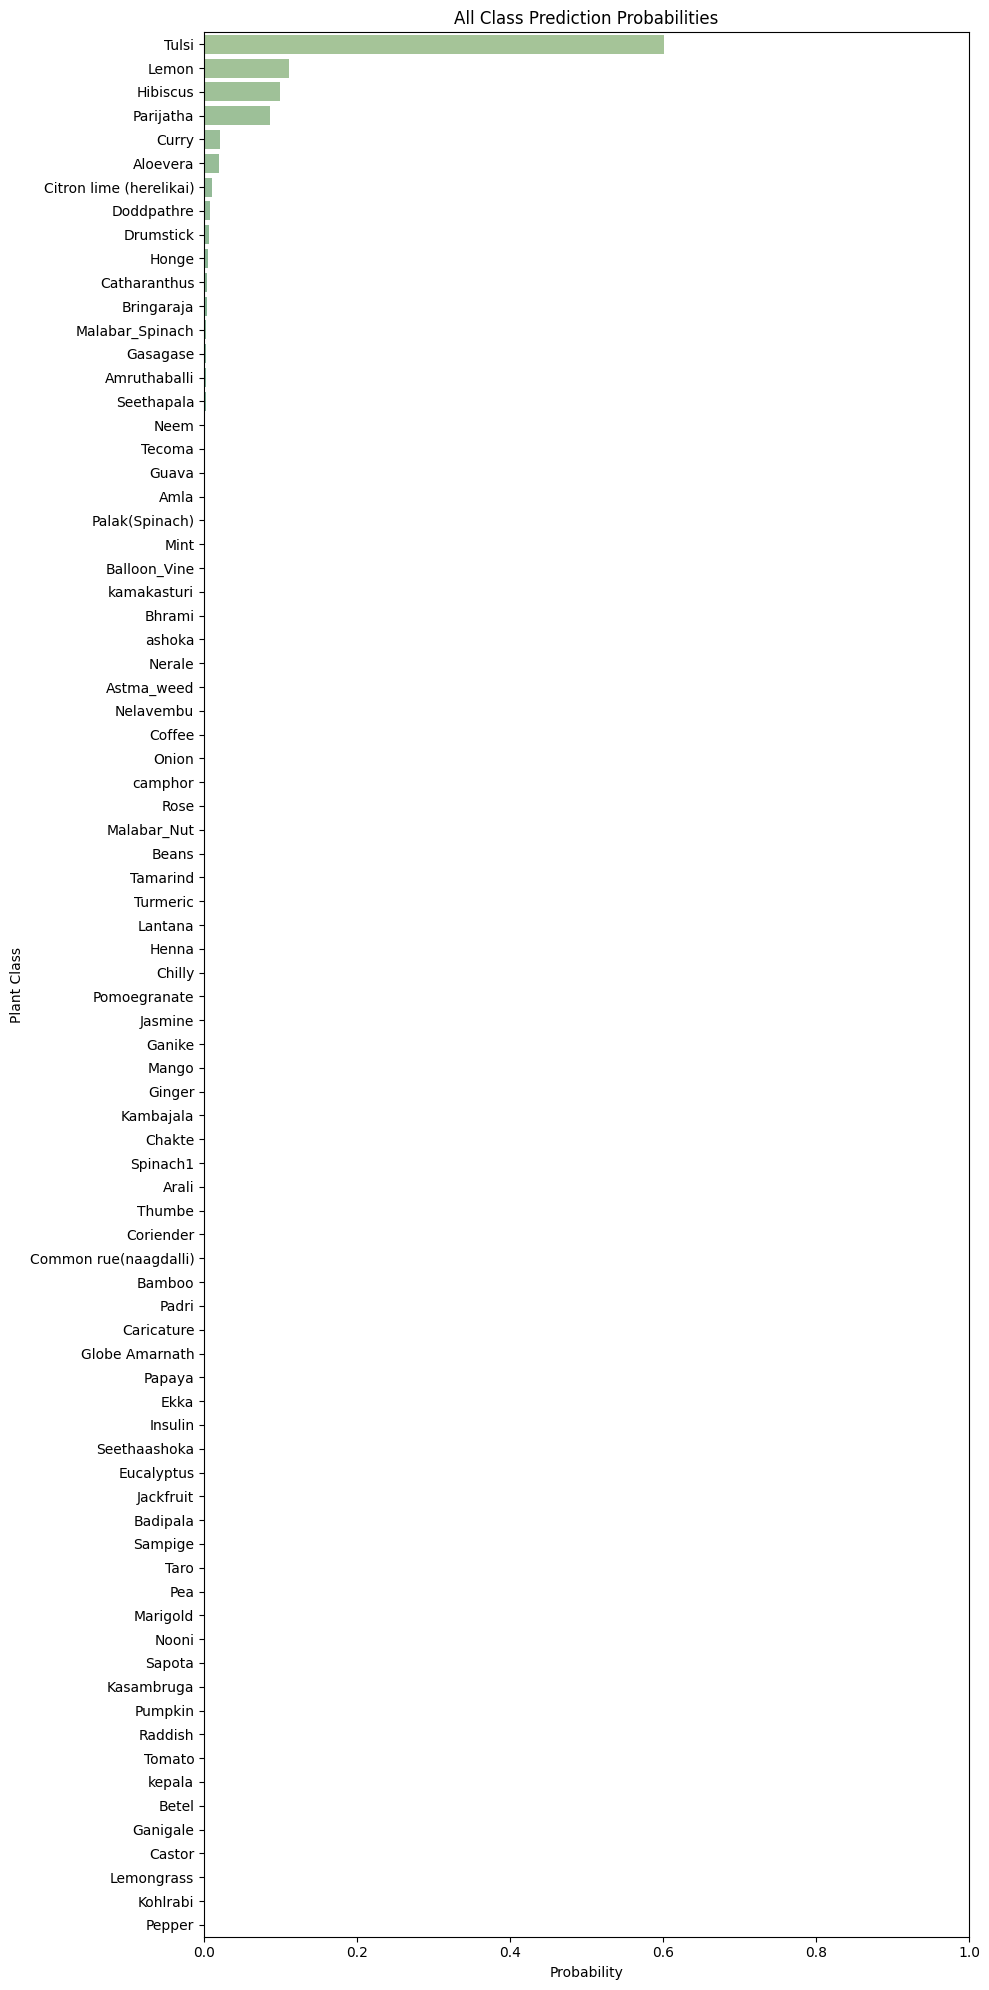


🪴 Plant Predicted: Tulsi

🩺 Medicinal Uses (via local_downloaded_model):
Tulsi can be used to make lupus, pyschritis, and fever.


In [35]:
# Example: Try with your own image path
image_path = r'D:\Desktop Files\OpenCv\INTERNSHIP_Aicte_project\datasets\Tulsi\j.14.jpg'  # Replace with actual image file
plant = load_and_predict(image_path)
uses = get_medicinal_uses(plant)

print(f"\n🪴 Plant Predicted: {plant}\n")
print(f"🩺 Medicinal Uses (via local_downloaded_model):\n{uses}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


C:\Users\anime\AppData\Local\Temp\ipykernel_18696\1814870843.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_probs, y=sorted_labels, palette="crest")


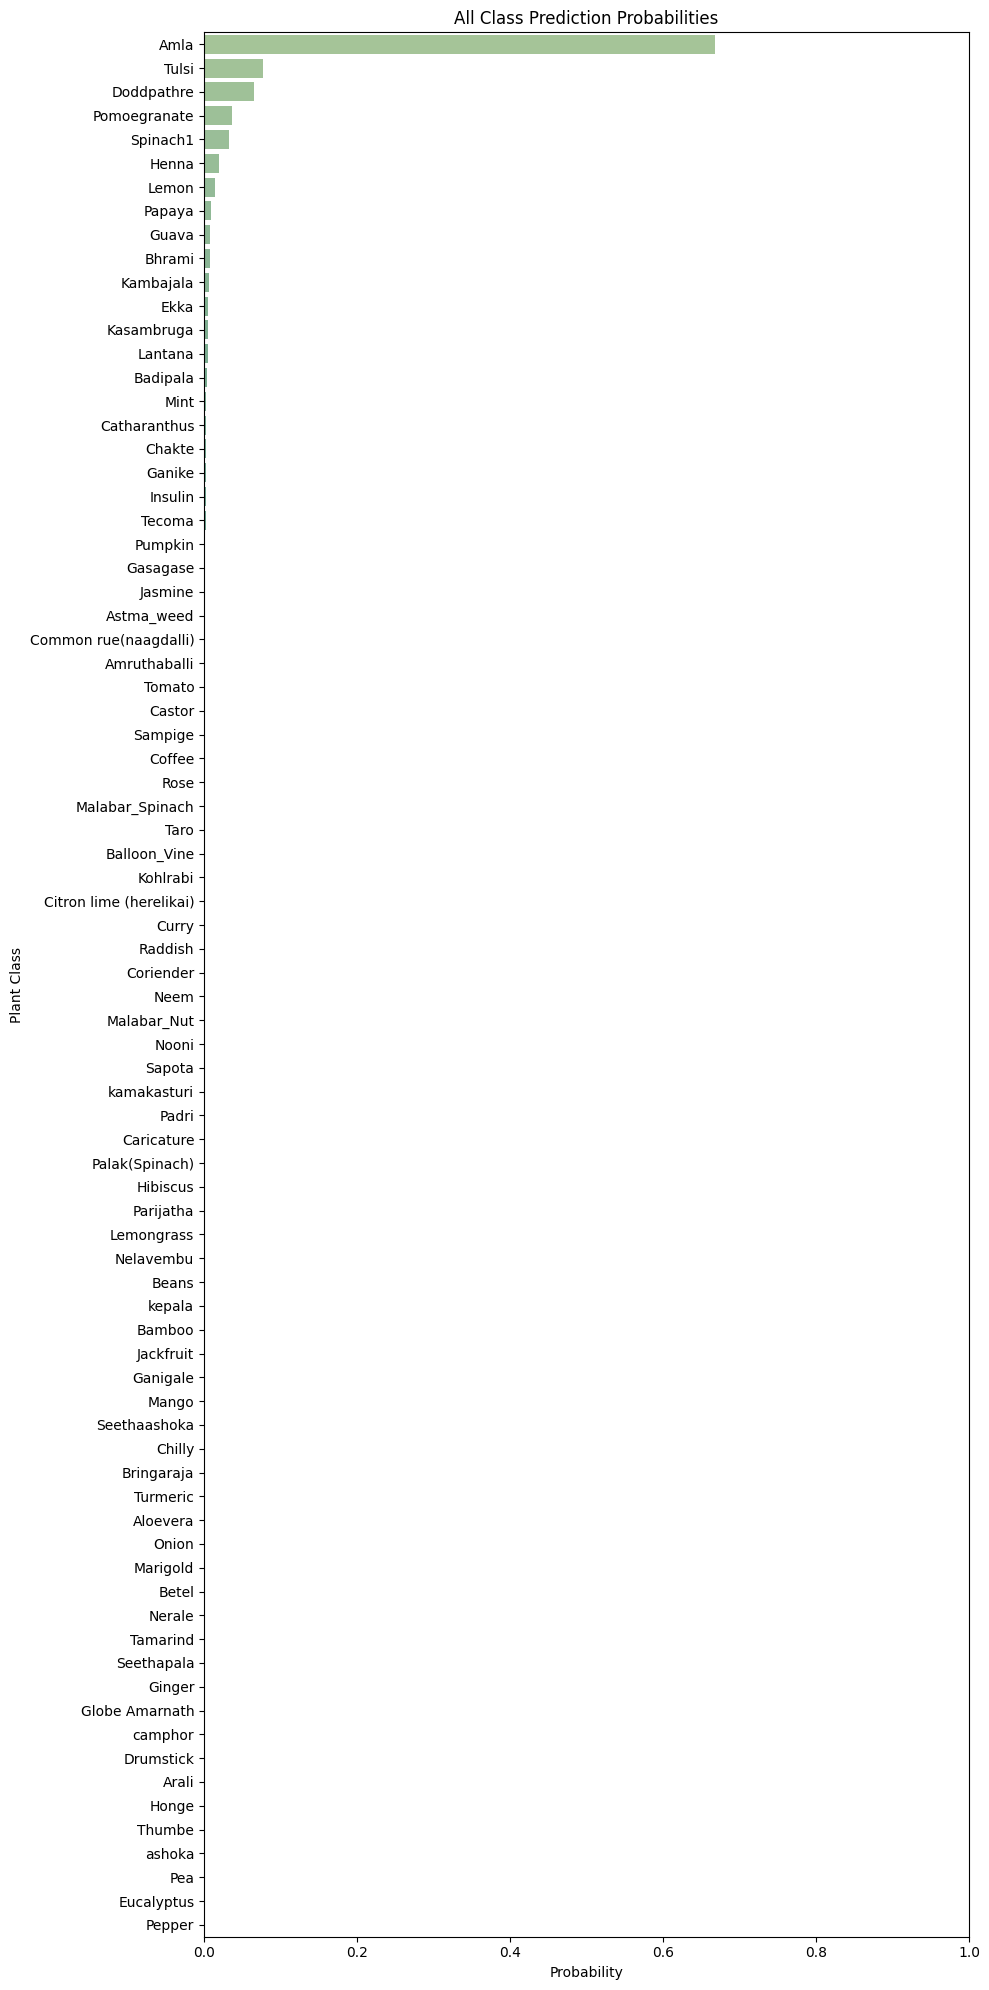


🪴 Plant Predicted: Amla

🩺 Medicinal Uses (via GPT):
Doshas (oil) Amla is a flowering plant originating in India, is a popular Ayurvedic medicine used as a sedative, a stimulant, and a sedative, and is especially well-known for its use as an astringent. It is also a popular medicinal plant in Asia, India, and Africa. The Amla flower contains several ayurvedic and medicinal properties. It is also a common herbal remedy of the droopy plant family. The Amla has also been used as a sedative in a lameen.


In [36]:
# Example: Try with your own image path
image_path = r'D:\Desktop Files\OpenCv\INTERNSHIP_Aicte_project\datasets\Amla\372.jpg'  # Replace with actual image file
plant = load_and_predict(image_path)
uses = get_medicinal_uses(plant)

print(f"\n🪴 Plant Predicted: {plant}\n")
print(f"🩺 Medicinal Uses (via GPT):\n{uses}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


C:\Users\anime\AppData\Local\Temp\ipykernel_18696\1814870843.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_probs, y=sorted_labels, palette="crest")


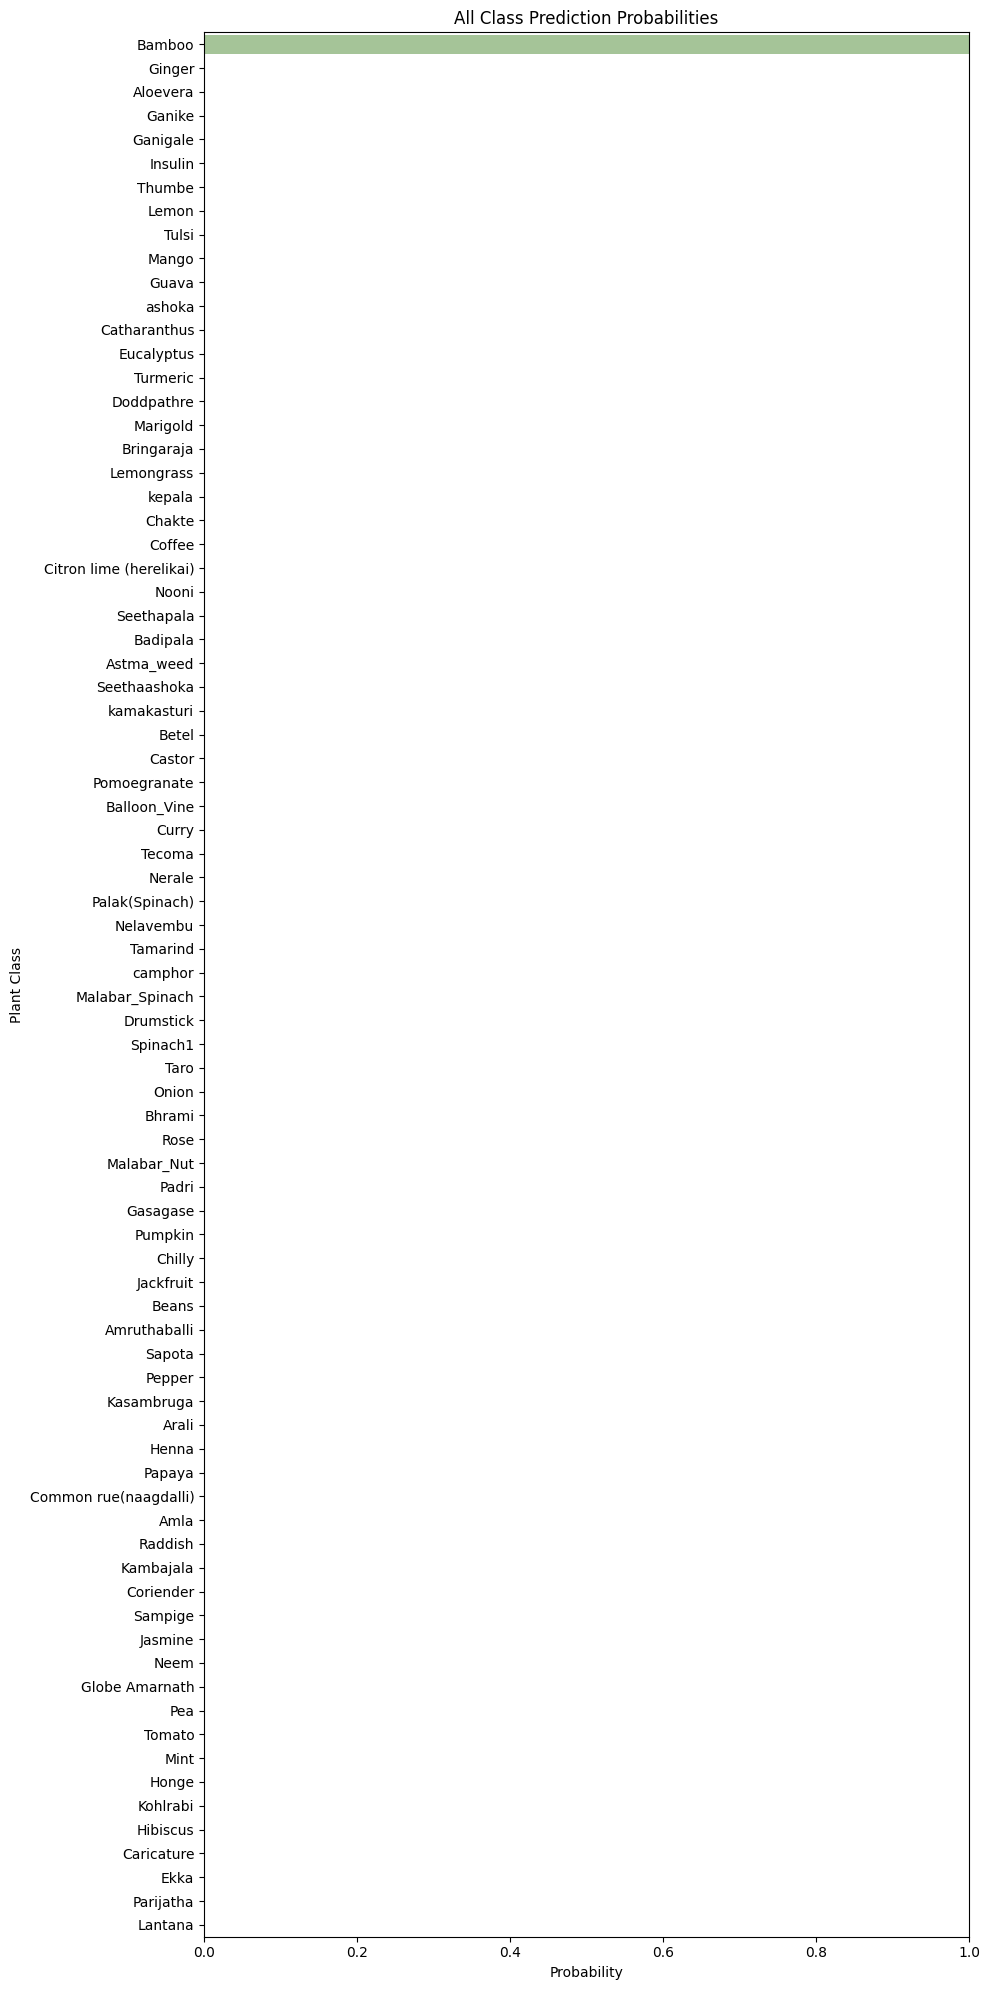


🪴 Plant Predicted: Bamboo

🩺 Medicinal Uses (via GPT):
Ayurvedic uses include treating dehydration; preventing burns; preventing cancer; and treating eye damage.


In [37]:
# Example: Try with your own image path
image_path = r'D:\Desktop Files\OpenCv\INTERNSHIP_Aicte_project\datasets\Bamboo\1634.jpg'  # Replace with actual image file
plant = load_and_predict(image_path)
uses = get_medicinal_uses(plant)

print(f"\n🪴 Plant Predicted: {plant}\n")
print(f"🩺 Medicinal Uses (via GPT):\n{uses}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


C:\Users\anime\AppData\Local\Temp\ipykernel_20164\1814870843.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_probs, y=sorted_labels, palette="crest")


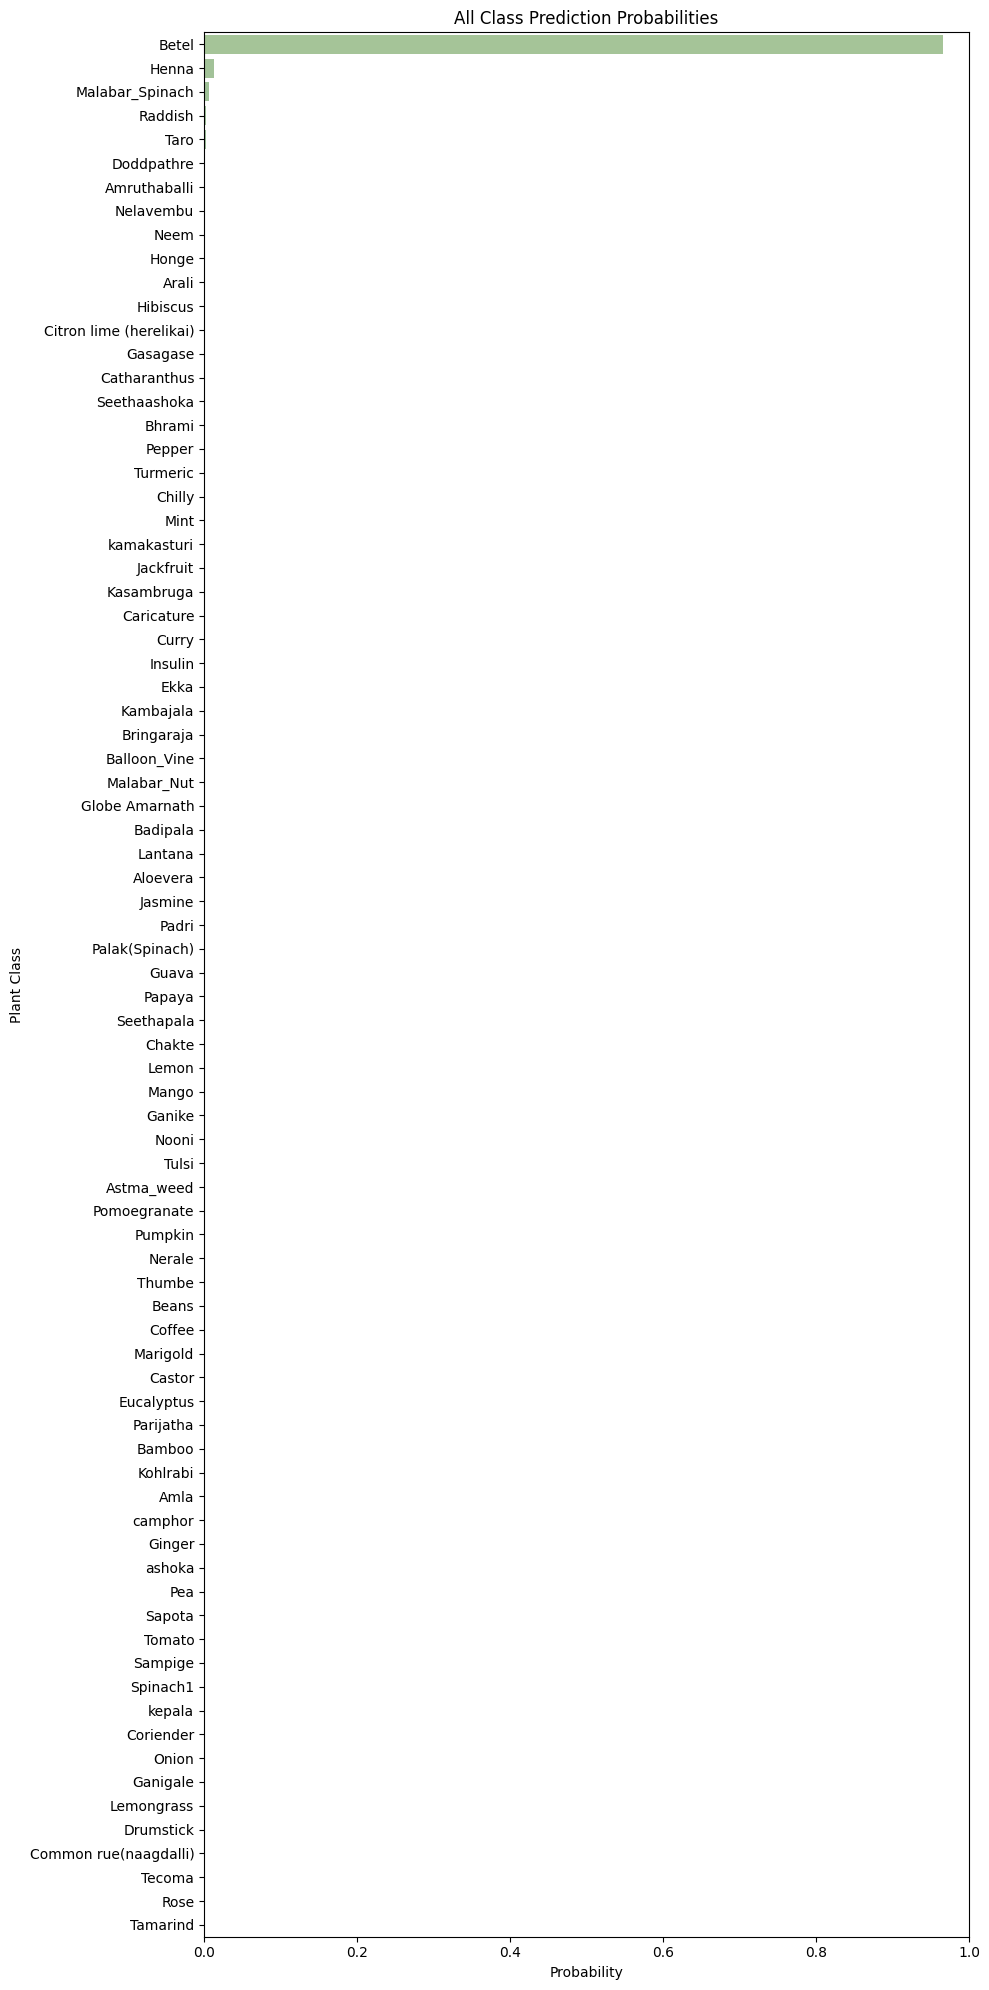


🪴 Plant Predicted: Betel

🩺 Medicinal Uses (via google/flan-t5-base):
Betel is a spice that has been traditionally used to season dishes and dishes. It has also been used as an ingredient in Indian curds and is an ayurvedic remedy.


In [7]:
# Example: Try with your own image path
image_path = r'D:\Desktop Files\OpenCv\INTERNSHIP_Aicte_project\360_F_522924550_0g19ePBFPdGquIVa6rzE84ZYZYd8nkjv.jpg'  # Replace with actual image file
plant = load_and_predict(image_path)
uses = get_medicinal_uses(plant)

print(f"\n🪴 Plant Predicted: {plant}\n")
print(f"🩺 Medicinal Uses (via google/flan-t5-base):\n{uses}")